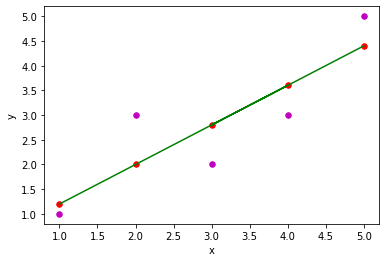

[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
RMSE: 0.693


In [12]:
# Standalone simple linear regression example
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", marker = "o", s = 30) 
    # predicted response vector 
    y_pred = b[0] + b[1]*np.array(x) 
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
    plt.scatter(x, y_pred, color = "r", marker = "o", s = 30) 
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
    # function to show plot 
    plt.show() 
# Calculate root mean squared error
def rmse_metric(actual, predicted):
        sum_sqr_error = 0.0
        for i in range(len(actual)):
            prediction_error = predicted[i] - actual[i]
            sum_sqr_error += (prediction_error ** 2)
        mean_sum_sqr_error = sum_sqr_error / float(len(actual))
        rmse= sqrt(mean_sum_sqr_error)
        return rmse

# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
        test_set = list()
        for row in dataset:
            row_copy = list(row)
            row_copy[-1] = None
            test_set.append(row_copy)
        predicted = algorithm(dataset, test_set)
        print(predicted)
        actual = [row[-1] for row in dataset]
        rmse = rmse_metric(actual, predicted)
        
        return rmse
'''
# Calculate the mean value of a list of numbers
def mean(values):
        return sum(values) / float(len(values))

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
        covar = 0.0
        for i in range(len(x)):
            covar += (x[i] - mean_x) * (y[i] - mean_y)
        return covar

# Calculate the variance of a list of numbers
def variance(values, mean):
        return sum([(x-mean)**2 for x in values])
'''
# Calculate coefficients
def coefficients(dataset):
        x = [row[0] for row in dataset]
        y = [row[1] for row in dataset]
        #x_mean, y_mean = mean(x), mean(y)
        # number of observations/points 
        n = np.size(x) 
        # mean of x and y vector 
        m_x, m_y = np.mean(x), np.mean(y) 
        M = np.sum((x - m_x) *(y-m_y)) / np.sum((x-m_x)**2)
        C = m_y - M*m_x 
        plot_regression_line(x, y, (C,M))
        return(C, M) 
# Simple linear regression algorithm
def simple_linear_regression(train, test):
        #print(train)
        #print(test)
        predictions = list()
        b0, b1 = coefficients(train)
        
        for row in test:
            X = row[0]
            y_pre = b0 + b1 * X
            predictions.append(y_pre)
        return predictions
        
# Test simple linear regression
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))